In [1]:
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np

## Utility Functions

In [2]:
def do_histogram(image, is_flattened=False):
    if not is_flattened:
        image = image.flatten()

    hist, bins = np.histogram(image, bins=256, range=[0, 256])
    bins = bins[1:]
    return hist, bins

def normalize(np_array: np.ndarray):
    np_array_max = np_array.max()
    normalized_array = np.array([number/np_array_max for number in np_array]).astype(np.float32)
    return normalized_array

def to_255(image):
    return (image * 255).astype(np.uint8)

def equalize_image(image, normalized_cdf: np.ndarray):
    new_image = normalized_cdf[image]
    return to_255(new_image)

## Image Visualization and Procesing

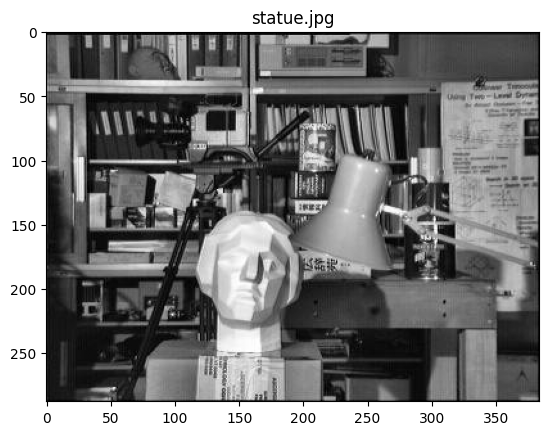

In [3]:
image = io.imread('images/statue.jpg', as_gray=True)
image = to_255(image)

plt.figure()
plt.imshow(image, cmap='grey')
plt.title("statue.jpg")
plt.show()

In [4]:
hist, bins = do_histogram(image)
# We compute the CDF
cdf = hist.cumsum()

# We normalize both the CDF asd the histogram
normalized_cdf = normalize(cdf)
normalized_hist = normalize(hist)

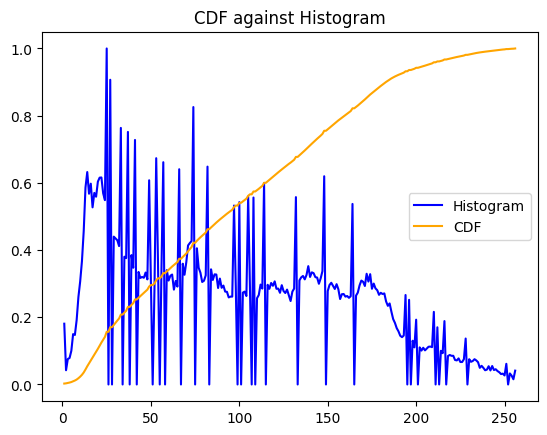

In [5]:
plt.figure()
plt.plot(bins, normalized_hist, color='blue', label='Histogram')
plt.plot(bins, normalized_cdf, color='orange', label='CDF')
plt.title('CDF against Histogram')
plt.legend()
plt.show()

## Image Equalization

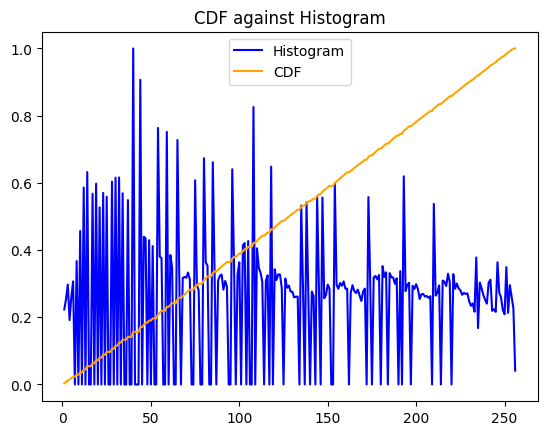

In [6]:
# Map original pixels to equalized values using the CDF
new_image = equalize_image(image, normalized_cdf)
hist, bins = do_histogram(new_image)
hist = normalize(hist)

# We compute the CDF
new_cdf = hist.cumsum()
normalized_new_cdf = normalize(new_cdf)

plt.figure()
plt.plot(bins, hist, color='blue', label='Histogram')
plt.plot(bins, normalized_new_cdf, color='orange', label='CDF')
plt.title('CDF against Histogram')
plt.legend()
plt.show()

## Image Comparison

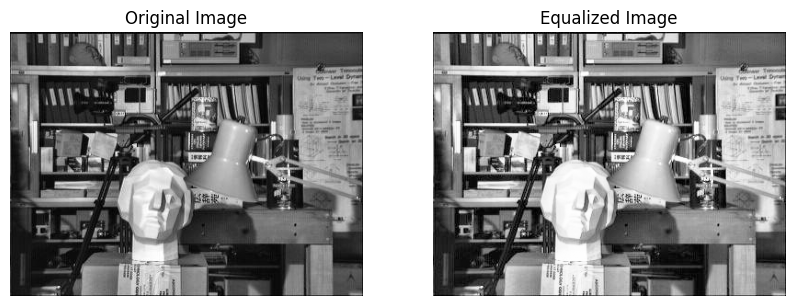

In [7]:

plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")  # Hide axis

# Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")  # Hide axis

plt.show()

## Funciones de Scikit

In [8]:
from skimage import io, color, exposure

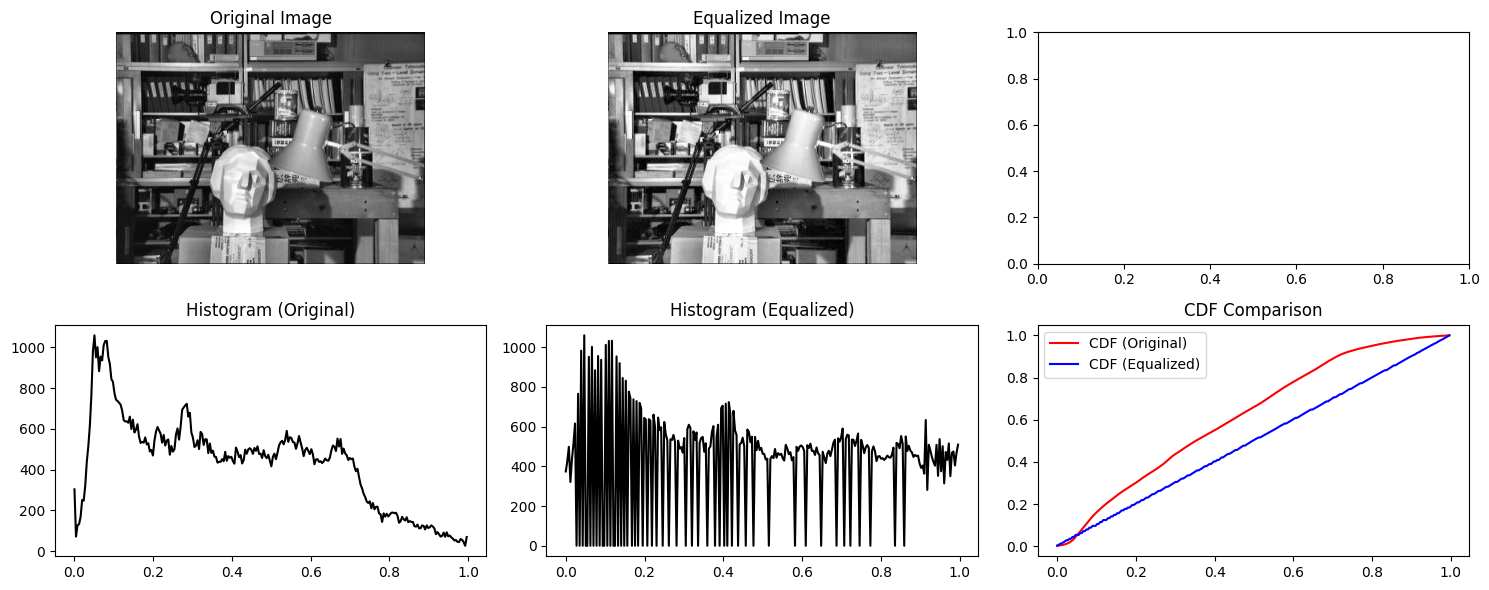

In [9]:
image = io.imread('images/statue.jpg')  # Replace with your image path
gray = color.rgb2gray(image)

# Equalize the image
equalized = exposure.equalize_hist(gray)

# Compute histograms and CDFs
hist_orig, bins = np.histogram(gray, bins=256, range=(0, 1))
hist_eq, bins_eq = np.histogram(equalized, bins=256, range=(0, 1))

cdf_orig = np.cumsum(hist_orig) / np.sum(hist_orig)
cdf_eq = np.cumsum(hist_eq) / np.sum(hist_eq)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Original Image
axes[0, 0].imshow(gray, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Equalized Image
axes[0, 1].imshow(equalized, cmap='gray')
axes[0, 1].set_title('Equalized Image')
axes[0, 1].axis('off')

# Histogram of Original Image
axes[1, 0].plot(bins[:-1], hist_orig, color='black')
axes[1, 0].set_title('Histogram (Original)')

# Histogram of Equalized Image
axes[1, 1].plot(bins_eq[:-1], hist_eq, color='black')
axes[1, 1].set_title('Histogram (Equalized)')

# CDF of Original Image
axes[1, 2].plot(bins[:-1], cdf_orig, color='red', label='CDF (Original)')
axes[1, 2].plot(bins_eq[:-1], cdf_eq, color='blue', label='CDF (Equalized)')
axes[1, 2].legend()
axes[1, 2].set_title('CDF Comparison')

plt.tight_layout()
plt.show()

## Preguntas

¿Son iguales sus resultados con los de la función de Python? Explique por qué son iguales o explique por qué hay diferencias.

* Al comparar los resultados de mi implementación de ecualización de imágenes con los obtenidos por la función de Python, los resultados son visualmente bastante similares, y no noto ninguna diferencia significativa. Esto se debe a que ambos métodos siguen el mismo principio matemático de ecualización de histograma, redistribuyendo los niveles de intensidad de los píxeles para lograr un histograma más uniforme. Aunque puede haber ligeras diferencias en los cálculos internos, como la normalización de valores o la forma en que se maneja la interpolación, estas variaciones son tan pequeñas que no afectan la calidad visual de la imagen. Las diferencias son mínimas y no perceptibles a simple vista.